In [1]:
!pip install datasets

In [2]:
# import libraries

import seaborn as sns
import pandas as pd
import numpy as np
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))

from datasets import list_datasets, load_dataset
from pprint import pprint

In [3]:
datasets_list = list_datasets() 
#pprint(datasets_list,compact=True) 

In [4]:

amazon_train = load_dataset('amazon_us_reviews','Video_Games_v1_00',split='train')

Reusing dataset amazon_us_reviews (/root/.cache/huggingface/datasets/amazon_us_reviews/Video_Games_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


In [5]:
df_copy = amazon_train
df = df_copy

In [6]:
!pip install emoji
import emoji

In [7]:
df = amazon_train.to_pandas()

In [8]:
def create_labels_from_rating(x):
    if x >= 0 and x < 3:
        return 0 # negative
    elif x == 3:
        return 1 # neutral
    else:
        return 2 # positive

In [9]:
df['label'] = df['star_rating'].apply(create_labels_from_rating)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,label
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,0,1,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,2
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,0,1,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,2
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,0,1,One Star,poor quality work and not as it is advertised.,2015-08-31,0
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,0,1,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,1
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,0,1,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,2


In [10]:
df[df["label"] == 1].count()

marketplace          153864
customer_id          153864
review_id            153864
product_id           153864
product_parent       153864
product_title        153864
product_category     153864
star_rating          153864
helpful_votes        153864
total_votes          153864
vine                 153864
verified_purchase    153864
review_headline      153864
review_body          153864
review_date          153864
label                153864
dtype: int64

In [ ]:
df[df["label"] == 0].count()

marketplace          286963
customer_id          286963
review_id            286963
product_id           286963
product_parent       286963
product_title        286963
product_category     286963
star_rating          286963
helpful_votes        286963
total_votes          286963
vine                 286963
verified_purchase    286963
review_headline      286963
review_body          286963
review_date          286963
label                286963
dtype: int64

In [11]:
df[df["label"] == 2].count()
# number of n., pos., and neg. diff, specially neg. and pos., they musst be balanced

marketplace          1345170
customer_id          1345170
review_id            1345170
product_id           1345170
product_parent       1345170
product_title        1345170
product_category     1345170
star_rating          1345170
helpful_votes        1345170
total_votes          1345170
vine                 1345170
verified_purchase    1345170
review_headline      1345170
review_body          1345170
review_date          1345170
label                1345170
dtype: int64

In [10]:
df = df[['review_body', 'label']].copy()
df.head()

,review_body,label
0,"Used this for Elite Dangerous on my mac, an am...",2
1,"Loved it, I didn't even realise it was a gami...",2
2,poor quality work and not as it is advertised.,0
3,"nice, but tend to slip away from stick in inte...",1
4,"Great amiibo, great for collecting. Quality ma...",2


In [11]:
df = df.sort_values(by='review_body', ascending=False)
df

,review_body,label
366752,🙈🙉🙊,0
252144,😺😺😺😸,2
235747,😱,1
235806,😱,1
236755,😬,0
...,...,...
135518,,2
368334,,2
139242,,2
30408,,0


In [12]:
test = df['review_body'][366752]
test
d = emoji.demojize(test.lower(), language='en')
d

':see-no-evil_monkey::hear-no-evil_monkey::speak-no-evil_monkey:'

In [12]:
# removing usernames from tweet
df['new_review'] = df.review_body.str.replace('@user', '')
df.head()

,review_body,label,new_review
366752,🙈🙉🙊,0,🙈🙉🙊
252144,😺😺😺😸,2,😺😺😺😸
235747,😱,1,😱
235806,😱,1,😱
236755,😬,0,😬


In [13]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
#df["new_review"] = df["new_review"].str.replace("[^a-zA-Z#]", " ")
df["new_review"] = df["new_review"].str.replace("#", " ")
df.head()

,review_body,label,new_review
366752,🙈🙉🙊,0,🙈🙉🙊
252144,😺😺😺😸,2,😺😺😺😸
235747,😱,1,😱
235806,😱,1,😱
236755,😬,0,😬


In [14]:
# rm html tags
import re as re

TAG_RE = re.compile(r'<[^>]+>')

df['new_review'] = df['review_body'].apply(lambda t: TAG_RE.sub('', t)) # re.sub('<.*?>','',t)

In [15]:
df

,review_body,label,new_review
366752,🙈🙉🙊,0,🙈🙉🙊
252144,😺😺😺😸,2,😺😺😺😸
235747,😱,1,😱
235806,😱,1,😱
236755,😬,0,😬
...,...,...,...
135518,,2,
368334,,2,
139242,,2,
30408,,0,


In [15]:

df['new_review'] = df['review_body'].apply(lambda t: emoji.demojize(t.lower(), language='en'))
df

,review_body,label,new_review
366752,🙈🙉🙊,0,:see-no-evil_monkey::hear-no-evil_monkey::spea...
252144,😺😺😺😸,2,:grinning_cat::grinning_cat::grinning_cat::gri...
235747,😱,1,:face_screaming_in_fear:
235806,😱,1,:face_screaming_in_fear:
236755,😬,0,:grimacing_face:
...,...,...,...
135518,,2,
368334,,2,
139242,,2,
30408,,0,


In [16]:
all_texts_preprocessed = list(df.review_body)
all_labels = list(df.label)
all_texts_preprocessed

['🙈🙉🙊',
 '😺😺😺😸',
 '😱',
 '😱',
 '😬',
 '😥😥',
 '😡didnt work',
 '😡',
 '😜',
 '😜',
 '😜',
 '😜',
 '😘😘😘😀im totally in love with this game.great experience!!',
 '😕',
 '😑😑i almost bought this thinking it was a xbox one',
 '😐😐😐😐😐',
 '😏😏',
 '😎😎😎',
 '😎👍',
 '😎',
 '😎',
 '😎',
 '😎',
 '😎',
 '😎',
 '😍😍😍',
 '😍😍😍',
 '😍😍😍',
 '😍love this game just played it and was shocked by the condition',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😌Very good game i love it💙',
 '😋❤️',
 '😊😊😊😊',
 '😊😊😊😊',
 '😊😊😊 love it. Thanks',
 '😊😊😊',
 '😊😀',
 '😊👍',
 '😊👍',
 '😊☺️',
 '😊great game',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😊',
 '😉',
 '😉',
 '😉',
 '😆😆😆',
 '😆👍',
 '😆thanks',
 '😆',
 '😆',
 '😆',
 '😄😄😄😄😄😄😄😄😄😄😄',
 '😄😄😄',
 '😄😄',
 '😄😀😂',
 '😄Campaign was very fun but they took out multiplayer unless you have xbox live gold. If you do have gold you are able to create your own transformer. Also in campaign it is fun to play as the Dinobot Grimlock. You are able to buy 3 different Dlc for multiplayer mode 

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:

!pip install transformers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')]

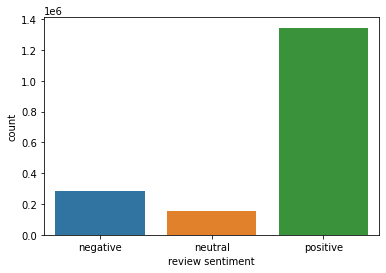

In [20]:
# Plot the score distribution after conversion
ax = sns.countplot(df.label)
class_names = ['negative', 'neutral', 'positive']
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [23]:
#all_texts_preprocessed, all_labels = all_texts_preprocessed[:len(all_texts_preprocessed)/3], all_labels[:len(all_labels)/3]
all_texts_preprocessed = all_texts_preprocessed[:25000]
all_labels = all_labels[:25000]
print(len(all_labels))

25000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(all_texts_preprocessed, all_labels, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_SEED, shuffle=True)
print(len(X_train), len(X_val), len(X_test))

20000 2500 2500


In [25]:
X_train[:10]

['Came in a tight sealed box. No bent corners on the saint row box it self. Very neat not just thrown in. Game, very out rages very fun. Dub step gun playes same song, has a laser pointer for &#34;aim.&#34; Bomes day button, has @two fail safe systems,&#34; fake plastic key, playes same thing. Johnny statue small and plastic. Over all great buy for 100$',
 "Good B-Ball game, a little better graphics, more realistic movements and computer play than 2k11. Some players look better, other players (Like Rondo, Doc Rivers) look like they are tired and sick, and not quite as good as the graphics from 2k11. But overall more player graphics look as good or even more realistic than 2k11.  A little more difficult than 2k11 as well. the Pro level in 2k12 is as difficult as all-star level on 2K12 (so each level is kicked up a notch) but this is still a fun game.<br /><br />My only major grip with 2k12, as with 2k11, is that the computer determines when you can bounce pass. I find this ridiculous, b

Colab craches skip this for now

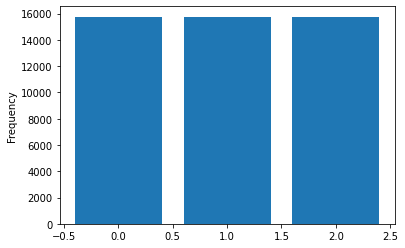

,new_review,label
0,thumbs up,2
1,"this works great. no problems at all,",2
2,you need a walk-through to get far in a this g...,2
3,"well, It is ok but bit very good ?!?...",1
4,you can also use this for when you got speaker...,2


In [25]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
data, label = sampler.fit_resample(np.array(X_train).reshape(-1,1), list(y_train))

class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['new_review'])
data['label'] = label
data.head()

In [26]:
from transformers import BertTokenizer
# Specify the pre-trained model name.
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
# Print the preprocessed review text.
print('Preprocessed Text: {}'.format(X_train[2]))

# Print the text split into tokens.
print('Tokens: {}'.format(tokenizer.tokenize(X_train[2])))

# Print the tokens mapped to token ids.
print('Token IDs: {}'.format(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(X_train[2]))))

Preprocessed Text: you need a walk-through to get far in a this game. my girlfriend and i got stuck trying to figure out hoe to get around the \\"Alice in wonderland level and something that would've have took 5 seconds to do took the night to figure out what to do next. you have to hit this tree to get up to a stairs and i was messing around trying to figure that out no one in the story even hinted at it.    it's a really fun game    i bought the strategy guide and it's been working out :)    BUY THE GAME WITH STRATEGY GUIDE........
Tokens: ['you', 'need', 'a', 'walk', '-', 'through', 'to', 'get', 'far', 'in', 'a', 'this', 'game', '.', 'my', 'girlfriend', 'and', 'i', 'got', 'stuck', 'trying', 'to', 'figure', 'out', 'ho', '##e', 'to', 'get', 'around', 'the', '\\', '\\', '"', 'alice', 'in', 'wonderland', 'level', 'and', 'something', 'that', 'would', "'", 've', 'have', 'took', '5', 'seconds', 'to', 'do', 'took', 'the', 'night', 'to', 'figure', 'out', 'what', 'to', 'do', 'next', '.', 'you

In [28]:
# Print the preprocessed review text.
print('Preprocessed Text: {}'.format(X_train[2]))

# Encode the preprocessed text by using encode_plus function
encoded = tokenizer.encode_plus(
                          text=X_train[2],
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]' and [PAD]
                          max_length=64,      # Pad & truncate all texts 
                          pad_to_max_length = True,
                          return_token_type_ids=False,
                          return_attention_mask = True, # Construct attention masks
                          return_tensors = 'pt', # Return pytorch tensors
                    )
print('input_ids: {}'.format(encoded['input_ids']))
print('attention_mask: {}'.format(encoded['attention_mask']))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Preprocessed Text: you need a walk-through to get far in a this game. my girlfriend and i got stuck trying to figure out hoe to get around the \\"Alice in wonderland level and something that would've have took 5 seconds to do took the night to figure out what to do next. you have to hit this tree to get up to a stairs and i was messing around trying to figure that out no one in the story even hinted at it.    it's a really fun game    i bought the strategy guide and it's been working out :)    BUY THE GAME WITH STRATEGY GUIDE........
input_ids: tensor([[  101,  2017,  2342,  1037,  3328,  1011,  2083,  2000,  2131,  2521,
          1999,  1037,  2023,  2208,  1012,  2026,  6513,  1998,  1045,  2288,
          5881,  2667,  2000,  3275,  2041,  7570,  2063,  2000,  2131,  2105,
          1996,  1032,  1032,  1000,  5650,  1999, 20365,  2504,  1998,  2242,
          2008,  2052,  1005,  2310,  2031,  2165,  1019,  3823,  2000,  2079,
          2165,  1996,  2305,  2000,  3275,  2041,  20

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [29]:
# So to put all the things together,
# we can write a class: with the input texts, labels, tokenizer and max_len
# we'll have the review_text, input_ids, attention_mask, labels as our output
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):

  def __init__(self, reviews, labels, tokenizer, max_len):
    self.reviews = reviews
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    label = self.labels[item]
    # `encode_plus` will:
      #   (1) Tokenize the text.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length` with [PAD] tokens
      #   (6) Create attention masks for [PAD] tokens
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True, # Add '[CLS]' and '[SEP]' and [PAD]
      max_length=self.max_len, # Pad & truncate all texts
      pad_to_max_length=True,
      return_token_type_ids=False,
      return_attention_mask=True, # Construct attention masks
      return_tensors='pt', # Return pytorch tensors
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'labels': torch.tensor(label, dtype=torch.long)
    }

In [30]:
# Then we use DataLoader class from pytorch https://pytorch.org/docs/stable/data.html
# which help us to customizing data loading order and do automatic batching
def create_data_loader(X, Y, tokenizer, max_len, batch_size, num_workers=2, sampler = None):
  ds = ReviewDataset(
    reviews=np.array(X),
    labels=np.array(Y),
    tokenizer=tokenizer,
    max_len=max_len
  )
  if sampler!=None:
    sampler = sampler(ds)

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=num_workers,
    sampler = sampler
  )

In [31]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
MAX_LEN = 128
BATCH_SIZE = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE, sampler = RandomSampler) # Select batches randomly

# For validation & testing samples, the order doesn't matter, so we'll just read them sequentially.
val_data_loader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

In [32]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels, in our case it's multi-class tasks with classes=3  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [33]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [36]:
# More optimizers to look up: https://pytorch.org/docs/stable/optim.html
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 1e-3
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-6.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [37]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4 (depend on the usage, you can also set it larger)
# We chose to run for 3
EPOCHS = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler, here we use a linear scheduler with no warmup steps
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# Define our loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [38]:
# Training
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model.train()
  total_train_accuracy = 0
  total_train_loss = 0
  losses = []
  correct_predictions = 0
  for step, batch in enumerate(data_loader):
    if step % 40 == 0 and not step == 0:
       print('Batch: {}  of  {}'.format(step, len(data_loader)))
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    model.zero_grad()
    outputs = model(
      input_ids=input_ids,
      token_type_ids=None,
      attention_mask=attention_mask,
      labels=labels
    )
    loss = outputs[0]
    total_train_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    logits = outputs[1].detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()
    total_train_accuracy += flat_accuracy(logits, label_ids)
  # Calculate the average loss over all of the batches.
  avg_train_accuracy = total_train_accuracy / len(data_loader)
  avg_train_loss = total_train_loss / len(data_loader) 
  return avg_train_accuracy, avg_train_loss

In [39]:
import numpy as np
from sklearn.metrics import f1_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def f1Score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(pred_flat, labels_flat)

In [40]:
# Evaluation

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model.eval()
  total_eval_accuracy = 0
  total_f1_score = 0
  total_eval_loss = 0
  nb_eval_steps = 0
  losses = []
  f1_label_ids = []
  f1_logits = []
  correct_predictions = 0
  with torch.no_grad():
    for batch in data_loader:
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      labels = batch["labels"].to(device)
      outputs = model(
        input_ids=input_ids,
        token_type_ids=None,
        attention_mask=attention_mask,
        labels=labels
      )
      total_eval_loss += outputs[0].item()
      logits = outputs[1].detach().cpu().numpy()
      label_ids = labels.to('cpu').numpy()
      total_eval_accuracy += flat_accuracy(logits, label_ids)
      f1_label_ids.append(label_ids)
      f1_logits.append(logits)

  avg_val_accuracy = total_eval_accuracy / len(data_loader)
  avg_val_loss = total_eval_loss / len(data_loader)
  #print("total_f1_score Loss: {0:.2f}".format(f1Score(f1_logits, f1_label_ids)))
  #print("Accuracy: {0:.2f}".format(avg_val_accuracy))
  #print("Validation Loss: {0:.2f}".format(avg_val_loss))
  return avg_val_accuracy, avg_val_loss

In [41]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
  print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(X_train)
  )
  print('Train loss: {}, Accuracy: {}'.format(train_loss, train_acc))
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(X_val)
  )
  print('Val loss: {}, Accuracy: {}'.format(val_loss, val_acc))
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch: 1/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  625
Batch: 80  of  625
Batch: 120  of  625
Batch: 160  of  625
Batch: 200  of  625
Batch: 240  of  625
Batch: 280  of  625
Batch: 320  of  625
Batch: 360  of  625
Batch: 400  of  625
Batch: 440  of  625
Batch: 480  of  625
Batch: 520  of  625
Batch: 560  of  625
Batch: 600  of  625
Train loss: 0.3753393678128719, Accuracy: 0.8697


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.3159383423626423, Accuracy: 0.8924050632911392

Epoch: 2/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  625
Batch: 80  of  625
Batch: 120  of  625
Batch: 160  of  625
Batch: 200  of  625
Batch: 240  of  625
Batch: 280  of  625
Batch: 320  of  625
Batch: 360  of  625
Batch: 400  of  625
Batch: 440  of  625
Batch: 480  of  625
Batch: 520  of  625
Batch: 560  of  625
Batch: 600  of  625
Train loss: 0.2602869281947613, Accuracy: 0.9114


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.311807880390294, Accuracy: 0.8892405063291139

Epoch: 3/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Batch: 40  of  625
Batch: 80  of  625
Batch: 120  of  625
Batch: 160  of  625
Batch: 200  of  625
Batch: 240  of  625
Batch: 280  of  625
Batch: 320  of  625
Batch: 360  of  625
Batch: 400  of  625
Batch: 440  of  625
Batch: 480  of  625
Batch: 520  of  625
Batch: 560  of  625
Batch: 600  of  625
Train loss: 0.19121754649281503, Accuracy: 0.94


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val loss: 0.3540433542213485, Accuracy: 0.8864715189873418

CPU times: user 39min 11s, sys: 19.4 s, total: 39min 31s
Wall time: 39min 40s


In [42]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)
print('Testing Accuracy: {}'.format(test_acc.item()))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Testing Accuracy: 0.882120253164557
